In [2]:
from IPython.display import Image

## Question 1. Run Mage

First, let's run Mage with Docker Compose. Follow the quick start guideline. 

What's the version of Mage we run? 

(You can see it in the UI)

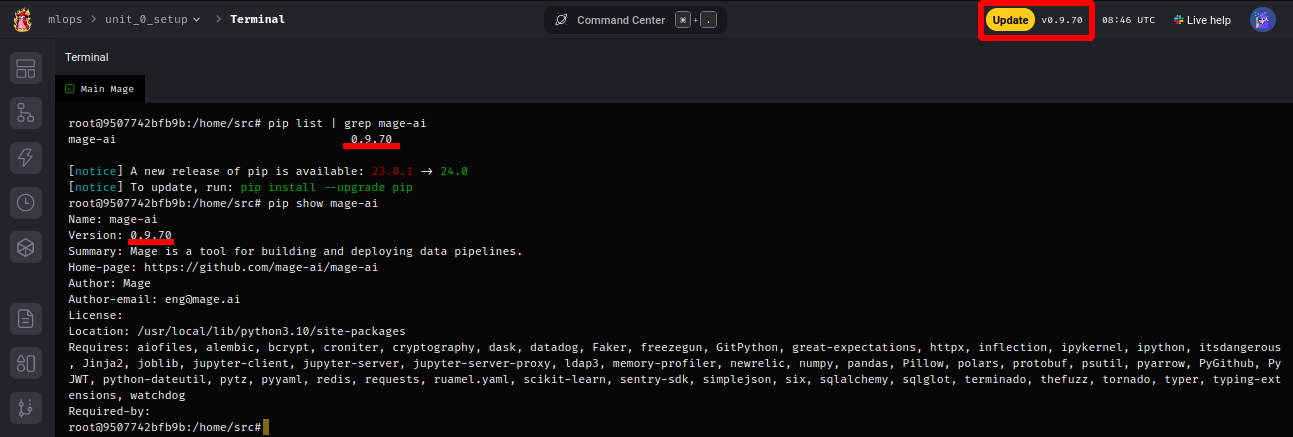

In [3]:

Image(filename='./screenshots/screenshot_Q1_hw3.png')

## ***Answer for Q1:==*** 0.9.70

## Question 2. Creating a project

Now let's create a new project. We can call it "homework_03", for example.

How many lines are in the created `metadata.yaml` file? 

- 35
- 45
- 55
- 65

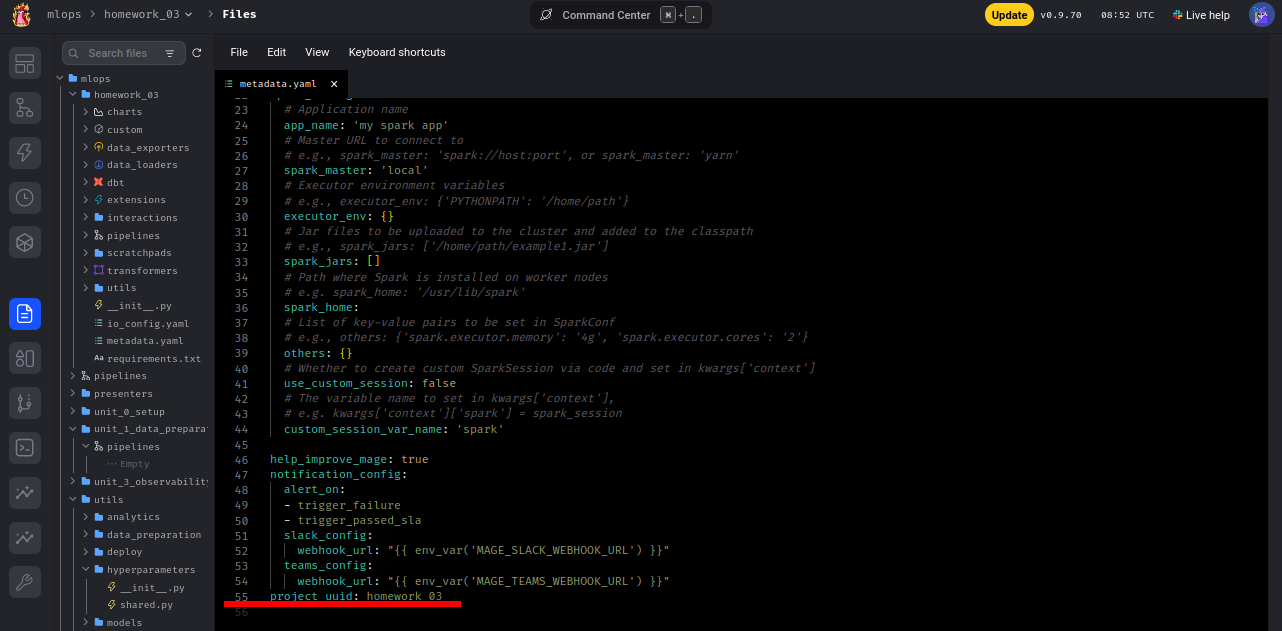

In [4]:
Image(filename='./screenshots/screenshot_Q2_hw3.png')

## ***Answer for Q2:==*** 55

## Question 3. Creating a pipeline

Let's create an ingestion code block.

In this block, we will read the March 2023 Yellow taxi trips data. We'll use [the same NYC taxi dataset](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page)

How many records did we load? 

- 3,003,766
- 3,203,766
- 3,403,766
- 3,603,766

code for ingest.py
```python
import requests
from io import BytesIO
from typing import List
import gc

import pandas as pd

if 'data_loader' not in globals():
    from mage_ai.data_preparation.decorators import data_loader

LOAD_COLUMNS = ['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'PULocationID', 'DOLocationID', 'trip_distance' ]

@data_loader
def ingest_files(**kwargs) -> pd.DataFrame:
    dfs: List[pd.DataFrame] = []

    for year, months in [(2023, (3, 4))]:
        for i in range(*months):
            print(year, i)
            response = requests.get(
                'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_'
                f'{year}-{i:02d}.parquet'
            )

            if response.status_code != 200:
                raise Exception(response.text)

            df = pd.read_parquet(BytesIO(response.content), columns=LOAD_COLUMNS)
            dfs.append(df)
            del df
            gc.collect()
    df = pd.concat(dfs)
    print(len(df))
    return df
```

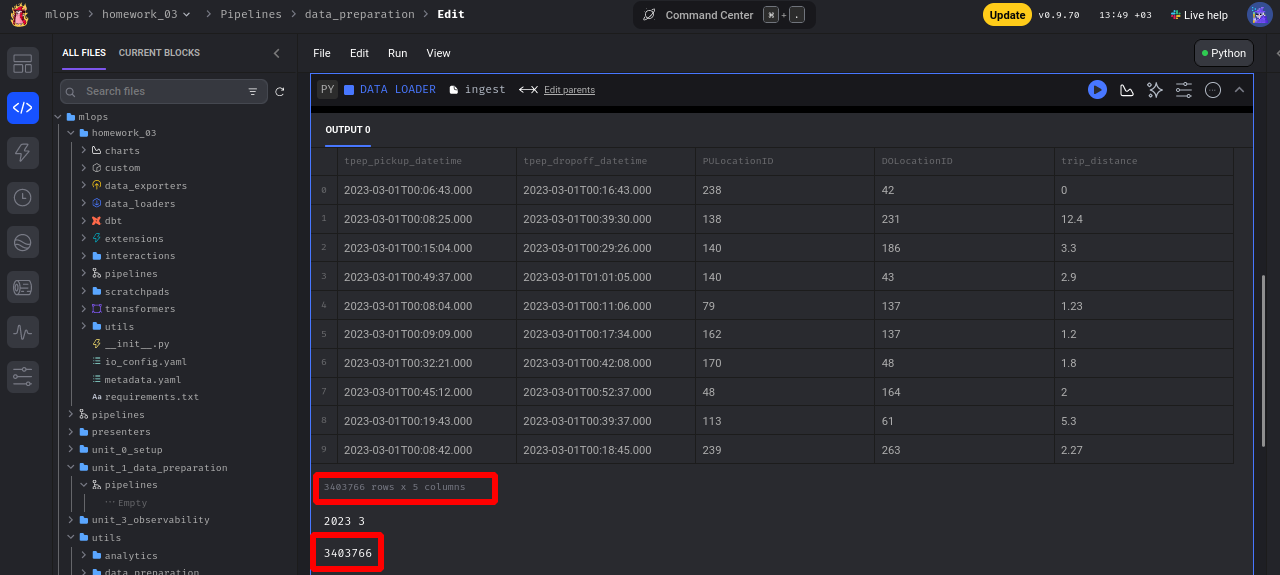

In [3]:
Image(filename='./screenshots/screenshot_Q3_hw3.png')

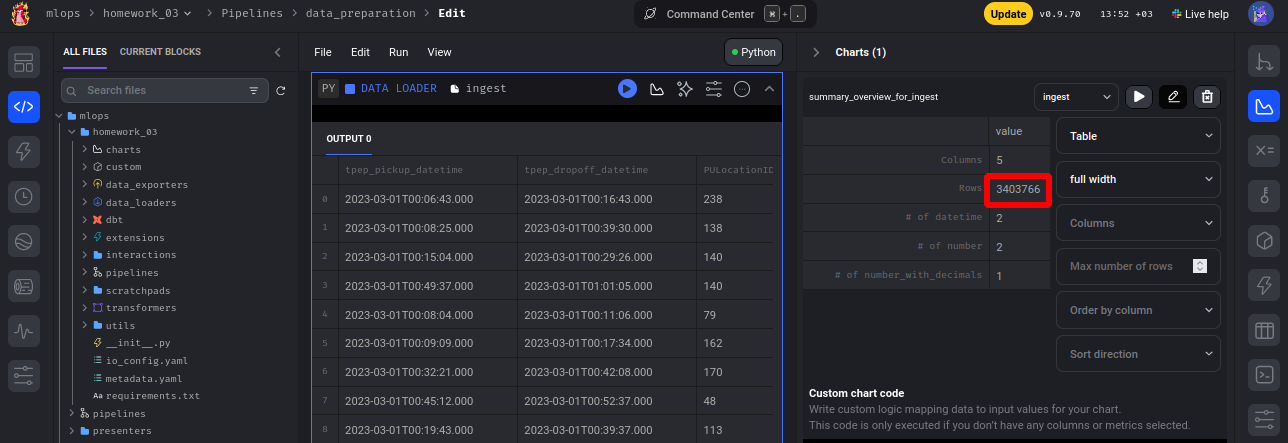

In [4]:
Image(filename='./screenshots/screenshot_Q3_hw3_2.png')

## ***Answer for Q3:==*** 3,403,766

## Question 4. Data preparation


Let's use the same logic for preparing the data we used previously. We will need to create a transformer code block and put this code there.

This is what we used (adjusted for yellow dataset):

```python
def read_dataframe(filename):
    df = pd.read_parquet(filename)

    df.tpep_dropoff_datetime = pd.to_datetime(df.tpep_dropoff_datetime)
    df.tpep_pickup_datetime = pd.to_datetime(df.tpep_pickup_datetime)

    df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df.duration = df.duration.dt.total_seconds() / 60

    df = df[(df.duration >= 1) & (df.duration <= 60)]

    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)

    return df
```

Let's adjust it and apply to the data we loaded in question 3. 

What's the size of the result? 


- 2,903,766
- 3,103,766
- 3,316,216
- 3,503,766